## Read File

First, we need to read the raw data from `sample_stream.jsonl`.<br/>
Due to each line holds a single JSON object, so we read one line by line util the end of this file.<br/>
For each line, we use `json.loads` to load this object as **Python** `dict` object, and append this object to a list.

In [44]:
import json


# This is a list that hold each comment.
# Each element is a dict that parsed from a single JSON line.
streams: list[dict] = []

# Open the file with read mode and utf-8 encoding.
# Then, read each line by each line, and append the the list.
with open("../data/sample_stream.jsonl", "r+", encoding="utf-8") as file:
    for line in file:
        streams.append(json.loads(line))

# Print each comment.
for i in streams:
    print(i)

{'timestamp': '2025-05-01T10:00:00', 'text': "I love this product! It's absolutely fantastic."}
{'timestamp': '2025-05-01T10:05:00', 'text': 'Not what I expected. Pretty disappointed.'}
{'timestamp': '2025-05-01T10:10:00', 'text': "It's okay, does the job. Nothing special though."}
{'timestamp': '2025-05-01T10:15:00', 'text': 'Terrible experience. Would not recommend!'}
{'timestamp': '2025-05-01T10:20:00', 'text': 'Absolutely brilliant. Exceeded my expectations.'}


## Initialize NLTK module

First we need to download the things that **NLTK** module necessary needed.<br/>
We running the following code to download them and check everything is OK.

Note that before import nltk, you need to make sure you already use **PIP** to install this module, because this is a third party module.<br>
You can use the following statements to install `nltk`. Please make sure you running this in the shell.

```shell
pip install nltk --upgrade
```

The `upgrade` argument is to make sure you will upgrade to the latest release.<br>
Just for those who already installed.

In [45]:
import nltk

# Download all the book we need.
nltk.download("gutenberg")
nltk.download("genesis")
nltk.download("inaugural")
nltk.download("nps_chat")
nltk.download("webtext")
nltk.download("treebank")
nltk.download('punkt_tab')
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("vader_lexicon")


# If all books are downloaded,
# then this line will have no error.
from nltk.book import *

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Happy2018new\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\Happy2018new\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Happy2018new\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\Happy2018new\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Happy2018new\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Happy2018new\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data

If no error was found, then we finish the preparation part.

## Tokenize

Now we can start the first step of pre-processing the data.<br/>
In the very beginning we should to do is to **tokenize** the users' comments.

To make the system to be stronger, or in the other words, to make it highly robust and suitable for most situations, we first need to do is sentence tokenize.

We use the following codes to this task.

In [46]:
# The result of "nltk.sent_tokenize" is a list of strings.
# And because we have multiple comments, so here we use
# `list[list[str]]` as the type hint.
sent_tokenize: list[list[str]] = []

# For each comment in the list,
# we do sentence tokenization and append the result to the list.
for i in streams:
    text: str = i["text"]
    sent_tokenize.append(nltk.sent_tokenize(text))

# To ensure the result match our expected,
# We print the tokenized sentences.
for index, sentences in enumerate(sent_tokenize):
    print(f"Comment {index+1}:")
    for sentence in sentences:
        print("\t" + sentence)
    print()

Comment 1:
	I love this product!
	It's absolutely fantastic.

Comment 2:
	Not what I expected.
	Pretty disappointed.

Comment 3:
	It's okay, does the job.
	Nothing special though.

Comment 4:
	Terrible experience.
	Would not recommend!

Comment 5:
	Absolutely brilliant.
	Exceeded my expectations.



Then the next step is to do word tokenize for each sentence.<br/>
To make everything in organized, I create a simple class named `Sentences` to store the data.

A single `Sentences` instance holds the following information.
- The origin comment (that this comment can have 1 or many sentences)
- Each sentence of this comment
- Each token for each sentence.

Use `__repr__` can show all these things more clearly.

In [47]:
class Sentences:
    origin_text: str
    sent_tokens: list[str]
    word_tokens: list[list[str]]

    def __init__(self, text: str) -> None:
        self.origin_text = text
        self.sent_tokens = nltk.sent_tokenize(self.origin_text)
        self.word_tokens = [nltk.word_tokenize(i) for i in self.sent_tokens]

    def __repr__(self) -> str:
        result = "Sentences("
        result += f"origin_text={json.dumps(self.origin_text,ensure_ascii=False)}, "
        result += f"sent_tokens={self.sent_tokens}, "
        result += f"word_tokens={self.word_tokens}"
        return result + ")"


comments = [Sentences(i["text"]) for i in streams]
for index, comment in enumerate(comments):
    print(f"Comment {index+1}:")
    print(f"\t{comment}")
    print()

Comment 1:
	Sentences(origin_text="I love this product! It's absolutely fantastic.", sent_tokens=['I love this product!', "It's absolutely fantastic."], word_tokens=[['I', 'love', 'this', 'product', '!'], ['It', "'s", 'absolutely', 'fantastic', '.']])

Comment 2:
	Sentences(origin_text="Not what I expected. Pretty disappointed.", sent_tokens=['Not what I expected.', 'Pretty disappointed.'], word_tokens=[['Not', 'what', 'I', 'expected', '.'], ['Pretty', 'disappointed', '.']])

Comment 3:
	Sentences(origin_text="It's okay, does the job. Nothing special though.", sent_tokens=["It's okay, does the job.", 'Nothing special though.'], word_tokens=[['It', "'s", 'okay', ',', 'does', 'the', 'job', '.'], ['Nothing', 'special', 'though', '.']])

Comment 4:
	Sentences(origin_text="Terrible experience. Would not recommend!", sent_tokens=['Terrible experience.', 'Would not recommend!'], word_tokens=[['Terrible', 'experience', '.'], ['Would', 'not', 'recommend', '!']])

Comment 5:
	Sentences(origin_te

## Stemming

Now we finish the tokenize processing step.

However, we want to state the appear count for each word, but you can simply think about this...
- play
- plays
- playing
- played
- player
- playful

Well, these words look the same, but different in **Python** because they have different characters so that they are different strings.<br/>
But we wish when we count these words, we can make they are the same, so the result count is 6 but not each word get count 1.

So the next step we need to do is to **Stemming** the tokens, to stem each word tokens so that it can be more convenient for me to state the words with different frequencies of occurrence and the same root will be classified into the same group.

In [48]:
from nltk.stem import PorterStemmer

DEFAULT_PORTER_STEMMER = PorterStemmer()


class StemSentences(Sentences):
    stem_tokens: list[list[str]]

    def __init__(self, text: str) -> None:
        super().__init__(text)
        self.stem_tokens = [
            [DEFAULT_PORTER_STEMMER.stem(j) for j in i] for i in self.word_tokens
        ]

    def __repr__(self) -> str:
        result = "StemSentences("
        result += f"origin_text={json.dumps(self.origin_text,ensure_ascii=False)}, "
        result += f"sent_tokens={self.sent_tokens}, "
        result += f"word_tokens={self.word_tokens}, "
        result += f"stem_tokens={self.stem_tokens}"
        return result + ")"


stem_comments = [StemSentences(i["text"]) for i in streams]
for index, comment in enumerate(stem_comments):
    print(f"Comment {index+1}:")
    print(f"\t{comment}")
    print()

Comment 1:
	StemSentences(origin_text="I love this product! It's absolutely fantastic.", sent_tokens=['I love this product!', "It's absolutely fantastic."], word_tokens=[['I', 'love', 'this', 'product', '!'], ['It', "'s", 'absolutely', 'fantastic', '.']], stem_tokens=[['i', 'love', 'thi', 'product', '!'], ['it', "'s", 'absolut', 'fantast', '.']])

Comment 2:
	StemSentences(origin_text="Not what I expected. Pretty disappointed.", sent_tokens=['Not what I expected.', 'Pretty disappointed.'], word_tokens=[['Not', 'what', 'I', 'expected', '.'], ['Pretty', 'disappointed', '.']], stem_tokens=[['not', 'what', 'i', 'expect', '.'], ['pretti', 'disappoint', '.']])

Comment 3:
	StemSentences(origin_text="It's okay, does the job. Nothing special though.", sent_tokens=["It's okay, does the job.", 'Nothing special though.'], word_tokens=[['It', "'s", 'okay', ',', 'does', 'the', 'job', '.'], ['Nothing', 'special', 'though', '.']], stem_tokens=[['it', "'s", 'okay', ',', 'doe', 'the', 'job', '.'], ['no

I create a new class named `StemSentences` that based on `Sentences`.<br/>
This new class has a new field named `stem_tokens` to store the stemming results for word tokens of each sentence.

`PorterStemmer` is the stemmer I used because this is widely used in English.<br/>
In addition, due to I'll not to change the stemmer, so use a constant `DEFAULT_PORTER_STEMMER` for it, so that we don't need to initialize stemmer by `PorterStemmer()` for each call of `stem`.

## Lemmatization

In the last part, **Stemming** can make us simple to count the words of each comments.

**Stemming** part can make different words which have the same root classified to the same groups, <br/>
which this is better for us to count the appear frequency of the tokens.

However, directly using the results of **Stemming** have some problems.
1. Sentiment analysis requires more precise semantics
2. The results of **Stemming** is for the machine and hard for human to read

Therefore, here we need **Lemmatization** to get the real English word for each token.<br/>
So we use the results of **Stemming** for frequency, <br/>
and **Lemmatization** results for sentiment score.

In [49]:
from nltk.stem import WordNetLemmatizer


DEFAULT_LEMMATIZER = WordNetLemmatizer()


class LemmerWrapper:
    @staticmethod
    def get_file_key(pos_tag):
        return {
            "NN": "n",
            "VB": "v",
            "RB": "r",
            "JJ": "a",
        }.get(pos_tag[:2], "n")

    @staticmethod
    def lemmatize(word: str) -> str:
        tag = nltk.pos_tag([word])[0][1]
        return DEFAULT_LEMMATIZER.lemmatize(word, LemmerWrapper.get_file_key(tag))


class FilterSentences(Sentences):
    stem_tokens: list[list[str]]
    lem_tokens: list[list[str]]

    def __init__(self, text: str) -> None:
        super().__init__(text)
        self.stem_tokens = [
            [DEFAULT_PORTER_STEMMER.stem(j) for j in i] for i in self.word_tokens
        ]
        self.lem_tokens = [
            [LemmerWrapper.lemmatize(j).lower() for j in i] for i in self.word_tokens
        ]

    def __repr__(self) -> str:
        result = "FilterSentences("
        result += f"origin_text={json.dumps(self.origin_text,ensure_ascii=False)}, "
        result += f"sent_tokens={self.sent_tokens}, "
        result += f"word_tokens={self.word_tokens}, "
        result += f"stem_tokens={self.stem_tokens}, "
        result += f"lem_tokens={self.lem_tokens}"
        return result + ")"


filter_comments = [FilterSentences(i["text"]) for i in streams]
for index, comment in enumerate(filter_comments):
    print(f"Comment {index+1}:")
    print(f"\t{comment}")
    print()

Comment 1:
	FilterSentences(origin_text="I love this product! It's absolutely fantastic.", sent_tokens=['I love this product!', "It's absolutely fantastic."], word_tokens=[['I', 'love', 'this', 'product', '!'], ['It', "'s", 'absolutely', 'fantastic', '.']], stem_tokens=[['i', 'love', 'thi', 'product', '!'], ['it', "'s", 'absolut', 'fantast', '.']], lem_tokens=[['i', 'love', 'this', 'product', '!'], ['it', "'s", 'absolutely', 'fantastic', '.']])

Comment 2:
	FilterSentences(origin_text="Not what I expected. Pretty disappointed.", sent_tokens=['Not what I expected.', 'Pretty disappointed.'], word_tokens=[['Not', 'what', 'I', 'expected', '.'], ['Pretty', 'disappointed', '.']], stem_tokens=[['not', 'what', 'i', 'expect', '.'], ['pretti', 'disappoint', '.']], lem_tokens=[['not', 'what', 'i', 'expect', '.'], ['pretty', 'disappointed', '.']])

Comment 3:
	FilterSentences(origin_text="It's okay, does the job. Nothing special though.", sent_tokens=["It's okay, does the job.", 'Nothing special t

We select `WordNetLemmatizer` to do the lemmatize.<br/>
Note that this time we'll still not change the instance of `WordNetLemmatizer` so we just use a constant to store a `WordNetLemmatizer()` so I can use it in anywhere.


`LemmerWrapper` wrapped a lemmer. This is util for me so I can just call `LemmerWrapper.lemmatize`.<br/>
`get_file_key` is to get the part of speech of the word based on the tag attached to nltk.

I place `get_file_key` and `lemmatize` into `LemmerWrapper` to make these 2 functions organized.<br/>
Use `staticmethod` for those two functions so that no need to create a new `LemmerWrapper` instance when calling the functions in this class.

Same as `StemSentences`, this time we still based on `Sentences`, but contains 2 extra fields named:
- `stem_tokens` (Store the stemming results)
- `lem_tokens` (Store the lemming results)

## Clean Stop Words

These words are some example of stop words in English.
- a
- an
- the
- and
- or

And these words actually just have a little contribution to the sentence.<br/>
However, we store these words in the tokens and count them, and it is not good for us.

Therefore, we should clean these stop words from the tokens.<br/>
Here let we do that, by create a new class named `StopWordCleaner`.

In [50]:
from nltk.corpus import stopwords

CONST_STOP_WORDS = set(stopwords.words("english"))
CONST_STOP_WORDS |= {",", ".", "!", "?", ";", ":", "'", '"', "`", "``"}
CONST_STOP_WORDS -= {
    "shan't",
    "wouldn't",
    "shouldn't",
    "wasn't",
    "aren't",
    "not",
    "mightn't",
    "no",
    "doesn't",
    "hasn't",
    "won't",
    "isn't",
    "out",
    "don't",
    "didn't",
    "needn't",
    "mustn't",
    "hadn't",
    "couldn't",
    "off",
    "nor",
}
CONST_STOP_WORDS -= {"very", "to"}
CONST_STOP_WORDS -= {"should", "can", "will"}
CONST_STOP_WORDS -= {"if"}
CONST_STOP_WORDS -= {"which", "who", "this", "those", "that", "these", "whom"}
CONST_STOP_WORDS -= {"each", "most", "few", "all", "some", "more", "any"}
CONST_STOP_WORDS -= {"before", "between", "during", "against", "after"}


class StopWordCleanner:
    @staticmethod
    def clean(sent: FilterSentences) -> FilterSentences:
        sent.stem_tokens = [
            [j if j not in CONST_STOP_WORDS else "" for j in i]
            for i in sent.stem_tokens
        ]
        sent.lem_tokens = [
            [j if j not in CONST_STOP_WORDS else "" for j in i] for i in sent.lem_tokens
        ]
        return sent


filter_comments = [StopWordCleanner.clean(i) for i in filter_comments]
for index, comment in enumerate(filter_comments):
    print(f"Comment {index+1}:")
    print(f"\t{comment}")
    print()

Comment 1:
	FilterSentences(origin_text="I love this product! It's absolutely fantastic.", sent_tokens=['I love this product!', "It's absolutely fantastic."], word_tokens=[['I', 'love', 'this', 'product', '!'], ['It', "'s", 'absolutely', 'fantastic', '.']], stem_tokens=[['', 'love', 'thi', 'product', ''], ['', "'s", 'absolut', 'fantast', '']], lem_tokens=[['', 'love', 'this', 'product', ''], ['', "'s", 'absolutely', 'fantastic', '']])

Comment 2:
	FilterSentences(origin_text="Not what I expected. Pretty disappointed.", sent_tokens=['Not what I expected.', 'Pretty disappointed.'], word_tokens=[['Not', 'what', 'I', 'expected', '.'], ['Pretty', 'disappointed', '.']], stem_tokens=[['not', '', '', 'expect', ''], ['pretti', 'disappoint', '']], lem_tokens=[['not', '', '', 'expect', ''], ['pretty', 'disappointed', '']])

Comment 3:
	FilterSentences(origin_text="It's okay, does the job. Nothing special though.", sent_tokens=["It's okay, does the job.", 'Nothing special though.'], word_tokens=[[

You can noticed that I removed some words from the original set which is `set(stopwords.words("english"))`, because we don't want the meaning of the sentences changed. For example, the reversal of meaning in the original sentence.

Still use `staticmethod` for `StopWordCleanner.clean` so that I can use it directly without create a `StopWordCleanner` instance.

In addition, with using of the following expressions, I also removed the punctuation marks from the token at the same time.
```python
CONST_STOP_WORDS |= {",", ".", "!", "?", ";", ":", "'", '"', "`", "``"}
```

## Compact Inverse Words

When we count the frequency of tokens, <br/>
you may can find a token list like this:
```python
["not", "good"]
```

And that means the program will think `good` and `not` have no relation, <br/>
and just count them as two independent words without any thinking.

But our human know this means `not good`, <br/>
so we need to combine these two tokens to something like that:
```python
["NEG_good"]
```

So let's do that.

In [51]:
class InverseCompacter:
    WINDOW_SIZE = 3
    NEG_TOKENS = {
        "won't",
        "n't",
        "out",
        "without",
        "no",
        "don't",
        "mightn't",
        "isn't",
        "doesn't",
        "shouldn't",
        "can't",
        "wouldn't",
        "hadn't",
        "nor",
        "off",
        "cannot",
        "needn't",
        "never",
        "shan't",
        "didn't",
        "couldn't",
        "mustn't",
        "not",
        "aren't",
        "hasn't",
        "wasn't",
    }

    @staticmethod
    def compact_tokens(tokens: list[str]) -> list[str]:
        result = []
        count = 0

        for token in tokens:
            token = token.lower()
            if token in InverseCompacter.NEG_TOKENS:
                count = InverseCompacter.WINDOW_SIZE
                result.append(token)
                continue
            if count > 0:
                result.append(f"NEG_{token}")
                count -= 1
            else:
                result.append(token)

        return result

    @staticmethod
    def compact_sentences(sent: FilterSentences) -> FilterSentences:
        sent.stem_tokens = [
            InverseCompacter.compact_tokens(i) for i in sent.stem_tokens
        ]
        return sent


filter_comments = [InverseCompacter.compact_sentences(i) for i in filter_comments]
for index, comment in enumerate(filter_comments):
    print(f"Comment {index+1}:")
    print(f"\t{comment}")
    print()


Comment 1:
	FilterSentences(origin_text="I love this product! It's absolutely fantastic.", sent_tokens=['I love this product!', "It's absolutely fantastic."], word_tokens=[['I', 'love', 'this', 'product', '!'], ['It', "'s", 'absolutely', 'fantastic', '.']], stem_tokens=[['', 'love', 'thi', 'product', ''], ['', "'s", 'absolut', 'fantast', '']], lem_tokens=[['', 'love', 'this', 'product', ''], ['', "'s", 'absolutely', 'fantastic', '']])

Comment 2:
	FilterSentences(origin_text="Not what I expected. Pretty disappointed.", sent_tokens=['Not what I expected.', 'Pretty disappointed.'], word_tokens=[['Not', 'what', 'I', 'expected', '.'], ['Pretty', 'disappointed', '.']], stem_tokens=[['not', 'NEG_', 'NEG_', 'NEG_expect', ''], ['pretti', 'disappoint', '']], lem_tokens=[['not', '', '', 'expect', ''], ['pretty', 'disappointed', '']])

Comment 3:
	FilterSentences(origin_text="It's okay, does the job. Nothing special though.", sent_tokens=["It's okay, does the job.", 'Nothing special though.'], wo

Note that this is only need to the `stem_tokens` field.<br/>
`lem_tokens` no need that because we need the original tokens.

## Machine Tokens to Human Readable

The results of **Stemming** is just for machine to read.

However, in the last we need to show these tokens, <br/>
or say, the words, to the clients.

Therefore, we need a map to convert the results from **Stemming** to real English words, <br/>
so that our human can read.

Now let's do it!

In [52]:
from dataclasses import dataclass, field


@dataclass
class StemToLemMapping:
    mapping: dict[str, str] = field(default_factory=lambda: {})

    def build_mapping(self, sentences: list[FilterSentences]) -> StemToLemMapping:
        for sentence in sentences:
            for i, tokens in enumerate(sentence.stem_tokens):
                for j, token in enumerate(tokens):
                    key, value = token, sentence.lem_tokens[i][j]
                    if len(token) == 0 or len(value) == 0:
                        continue
                    if key in self.mapping:
                        continue
                    self.mapping[key] = value
        return self

    def check_stem_token(self, stem_token: str) -> bool:
        return stem_token in self.mapping

    def get_lem_token(self, stem_token: str, negative_prefix: str = "(negative)") -> str:
        result = self.mapping.get(stem_token, stem_token)
        if stem_token.startswith("NEG_"):
            return negative_prefix + " " + result
        return result


mapping = StemToLemMapping().build_mapping(filter_comments)
for key, value in mapping.mapping.items():
    print(f"{key} => {mapping.get_lem_token(key)}")

love => love
thi => this
product => product
's => 's
absolut => absolutely
fantast => fantastic
not => not
NEG_expect => (negative) expect
pretti => pretty
disappoint => disappointed
okay => okay
job => job
noth => nothing
special => special
though => though
terribl => terrible
experi => experience
would => would
NEG_recommend => (negative) recommend
brilliant => brilliant
exceed => exceeded
expect => expectation


Module `dataclass` can help us easily to manage the class field.<br/>
`field(default_factory=lambda: {})` is to ensure if the user not given a dict, then create a new empty dict for the `mapping` field.

## Use Vader to get the feeling scores

Now we can start to get the feeling scores of the following things.
- Each comment
- Each sentence of each comment
- Each token of each sentence

Due to in the end we should ouput corresponding `.csv` and `.png` file, <br/>
and now we can start to think about how can we use the scores we get to ouput data.

### Each Comment
We planned to get score of each comment.

For the generated image, the horizontal axis represents the score, <br/>
and the vertical axis represents the number of comments within the corresponding score range.

In the other words, we split horizontal axis by a number so that we can get multiple chunks. Each chunks represents a score range, and we compute how many comments is in this range, and make as the "number" of this chunk.

Then we can use a bar chart to display the value of each chunk.

### Each Sentence

It's also the same to **Each Comment** part, but not completely the same.

Actually speaking, we can compute the score for each sentence, <br/>
and compute the average score of these sentences which these sentences is from a single comment, <br/>
and lastly this score is the final score of this comment.

The rest of the things are same to the **Each Comment** part.

### Each Token

We can count the appear count for each tokens, and the score of them.

We keep the horizontal axis with same meaning, <br/>
but the vertical axis shows the occurrence count of each token.

In this case we can make each token as discrete points in the graph, <br/>
so that a line graph will be used at last.

Due to there can be a lot of tokens, <br/>
so we can only display those with a frequency within the top `X%`.

### Start to work
Now we know what we need to show in the final result, <br/>
so here we can start to design a **Python** class to compute the score.

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

DEFAULT_VADER_ANALYZER = SentimentIntensityAnalyzer()


class CommentWithScore:
    comment: FilterSentences
    score: float

    def __init__(self, comment: FilterSentences, average_mode: bool = False) -> None:
        self.comment = comment
        self.score = CommentProcesser.process_comment(comment, average_mode)

    def __repr__(self) -> str:
        return f"CommentWithScore(comment={self.comment}, score={self.score})"


class CommentProcesser:
    @staticmethod
    def process_comment(
        sentences: FilterSentences, average_mode: bool = False
    ) -> float:
        if not average_mode:
            result = DEFAULT_VADER_ANALYZER.polarity_scores(sentences.origin_text)
            return result["compound"]

        scores: list[float] = []
        for i in sentences.sent_tokens:
            score = DEFAULT_VADER_ANALYZER.polarity_scores(i)
            scores.append(score["compound"])

        if len(scores) == 0:
            return 0.0
        return sum(scores) / len(scores)


@dataclass
class TokenWithScore:
    token: str
    count: int
    score: float = 0.0

    def __repr__(self) -> str:
        return f"TokenWithScore(token={self.token}, count={self.count}, score={self.score})"


class TokenProcesser:
    @staticmethod
    def get_top_stem_tokens(
        comments: list[FilterSentences], percent: float = 0.2
    ) -> list[TokenWithScore]:
        mapping: dict[str, int] = {}
        for comment in comments:
            for tokens in comment.stem_tokens:
                for token in tokens:
                    if len(token) == 0:
                        continue
                    if token not in mapping:
                        mapping[token] = 0
                    mapping[token] += 1

        token_list = [(value, key) for key, value in mapping.items()]
        token_list.sort(reverse=True)

        result = token_list[: int(len(token_list) * percent)]
        result = [TokenWithScore(i[1], i[0]) for i in result]
        return result

    @staticmethod
    def get_token_score(tokens: list[TokenWithScore], mapping: StemToLemMapping):
        result: list[TokenWithScore] = []

        for i in tokens:
            if not mapping.check_stem_token(i.token):
                continue

            lem_token = mapping.get_lem_token(i.token, "")
            lem_score = DEFAULT_VADER_ANALYZER.polarity_scores(lem_token)
            lem_score = lem_score["compound"]

            if i.token.startswith("NEG_"):
                # By asking AI how to inverse the meaning,
                # it suggests me to times -0.74 and that's
                # why I do it here.
                #       -- Happy2018new (Alexis)
                lem_score *= -0.74

            if lem_score != 0.0:
                result.append(TokenWithScore(i.token, i.count, lem_score))

        return result


comment_scores = [CommentWithScore(i, True) for i in filter_comments]
top_tokens = TokenProcesser.get_top_stem_tokens(filter_comments, 1)
token_scores = TokenProcesser.get_token_score(top_tokens, mapping)

for i in comment_scores:
    print(i)
for i in token_scores:
    print(i)

CommentWithScore(comment=FilterSentences(origin_text="I love this product! It's absolutely fantastic.", sent_tokens=['I love this product!', "It's absolutely fantastic."], word_tokens=[['I', 'love', 'this', 'product', '!'], ['It', "'s", 'absolutely', 'fantastic', '.']], stem_tokens=[['', 'love', 'thi', 'product', ''], ['', "'s", 'absolut', 'fantast', '']], lem_tokens=[['', 'love', 'this', 'product', ''], ['', "'s", 'absolutely', 'fantastic', '']]), score=0.634)
CommentWithScore(comment=FilterSentences(origin_text="Not what I expected. Pretty disappointed.", sent_tokens=['Not what I expected.', 'Pretty disappointed.'], word_tokens=[['Not', 'what', 'I', 'expected', '.'], ['Pretty', 'disappointed', '.']], stem_tokens=[['not', 'NEG_', 'NEG_', 'NEG_expect', ''], ['pretti', 'disappoint', '']], lem_tokens=[['not', '', '', 'expect', ''], ['pretty', 'disappointed', '']]), score=0.0129)
CommentWithScore(comment=FilterSentences(origin_text="It's okay, does the job. Nothing special though.", sent_

## Visualization

Now we have already finish a lot of the things, <br/>
and now comes the last things which is **Visualization**.

Let's start do it!

In [54]:
import matplotlib.pyplot as plt
from adjustText import adjust_text


class Visualizer:
    @staticmethod
    def show_comments_trend(data: list[float], steps: int = 5) -> None:
        # Pre chunk
        if len(data) == 0 or steps <= 0:
            raise Exception("show_comments_trend: Invalid user input")

        # Edges / Chunks
        min_v, max_v = min(data), max(data)
        bin_width = (max_v - min_v) / steps
        edges = [min_v + i * bin_width for i in range(steps + 1)]

        # Count for each chunk
        counts = [0] * steps
        for x in data:
            idx = min(int((x - min_v) / bin_width), steps - 1)
            counts[idx] += 1

        # Colors, Label for center of each chunk
        cmap = plt.get_cmap("viridis")
        colors = cmap([i / (steps - 1) for i in range(steps)])
        centers = [(edges[i] + edges[i + 1]) / 2 for i in range(steps)]

        # Draw
        plt.figure(figsize=(14, 7))
        gca = plt.gca()
        _ = gca.bar(
            range(steps), counts, color=colors, edgecolor="black", linewidth=0.6
        )
        gca.set_xticks(range(steps))
        gca.set_xticklabels([f"{round(c, 2)}" for c in centers])
        gca.set_xlabel("Sentiment Score")
        gca.set_ylabel("Comment Count")
        gca.set_title("Sentiment Trend of Comments")

        # Show
        plt.tight_layout()
        plt.show()

    @staticmethod
    def show_tokens_trend(
        data: list[TokenWithScore], mapping: StemToLemMapping
    ) -> None:
        if len(data) == 0:
            raise Exception("show_tokens_trend: Invalid user input")

        # Prepare
        data = sorted(data, key=lambda x: x.score)
        x_vals = [t.score for t in data]
        y_vals = [t.count for t in data]
        labels = [mapping.get_lem_token(t.token, "(negative)") for t in data]

        # Colors
        cmap = plt.get_cmap("rainbow")
        colors = cmap([i / (len(data) - 1) for i in range(len(data))])

        # Normal
        plt.figure(figsize=(14, 7))
        plt.plot(x_vals, y_vals, color="lightblue", linewidth=1.5, zorder=1)
        plt.scatter(x_vals, y_vals, c=colors, edgecolor="black", zorder=3)

        # Label
        texts = []
        for x, y, txt in zip(x_vals, y_vals, labels):
            texts.append(
                plt.text(x, y, txt, ha="center", va="bottom", fontsize=9)
            )
        adjust_text(
            texts,
            x=x_vals,
            y=y_vals,
            expand_points=(1.4, 1.4),
            expand_text=(1.2, 1.2),
            force_text=0.8,
            force_points=0.8,
        )

        # Normal
        plt.xlabel("Sentiment Score")
        plt.ylabel("Token Appear Count")
        plt.title("Sentiment Trend of Tokens")

        # Show
        plt.tight_layout()
        plt.show()

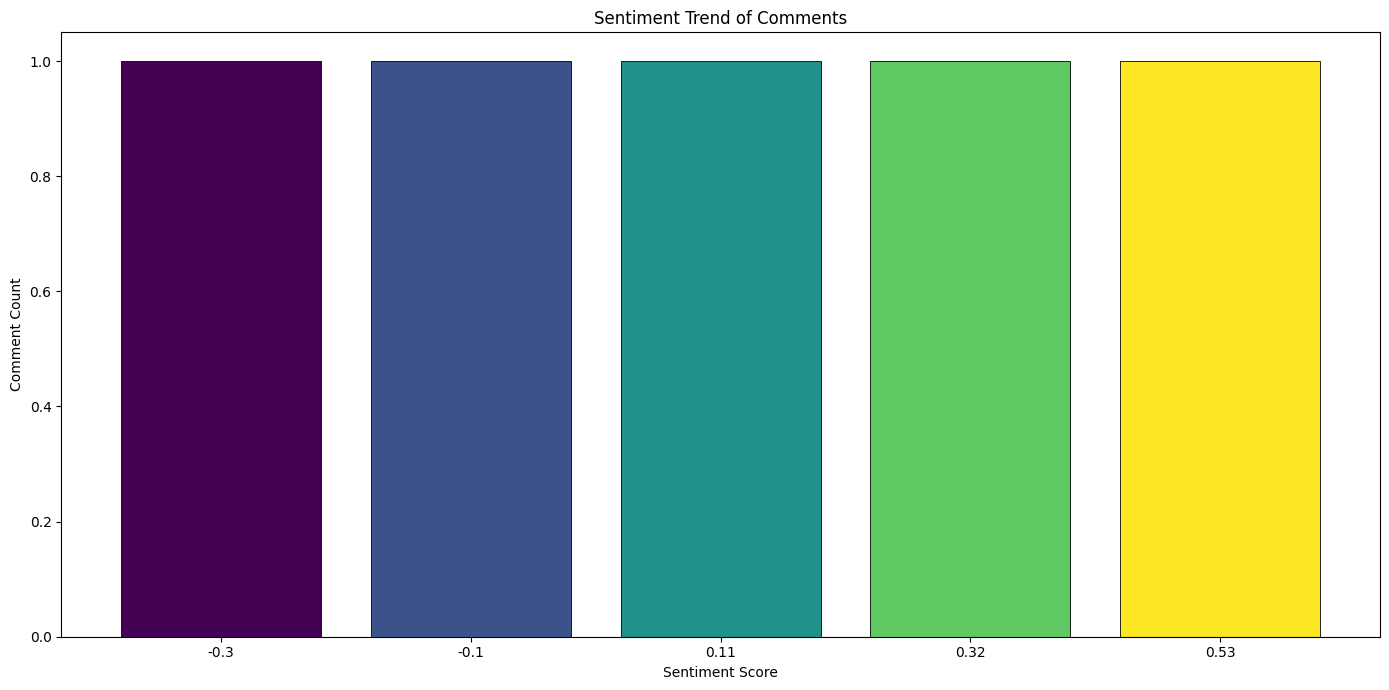

0 [-0.83026648  0.97633456]
1 [0.86226664 0.72426289]


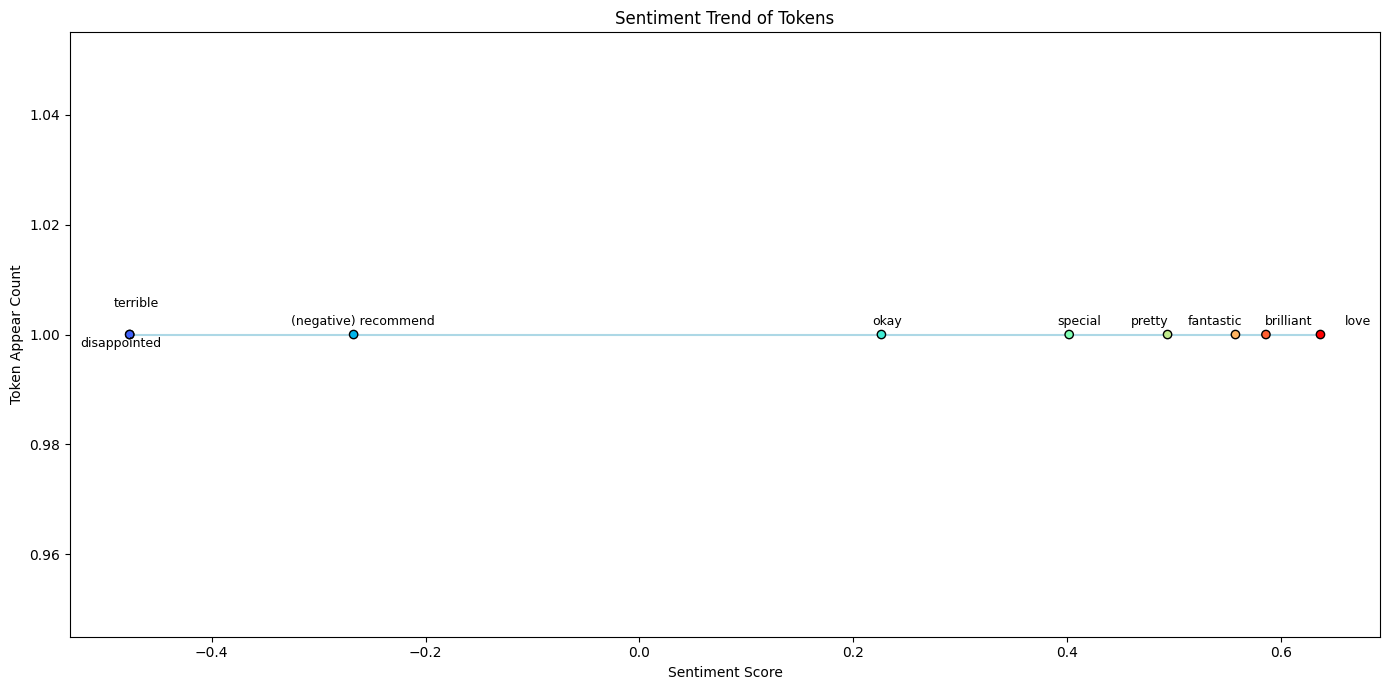

In [55]:
Visualizer.show_comments_trend([i.score for i in comment_scores], steps=5)
Visualizer.show_tokens_trend(token_scores, mapping)

Note that these third party packages are needed for visualization.<br/>
I directly showed the shell commands here, just run them is OK.

```shell
pip install matplotlib --upgrade
pip install adjustText --upgrade
```

## CSV File

Also, we need to dump our analysis results to CSV file.<br/>
This is not very difficult, and let's do it now.

In [56]:
import csv
from pathlib import Path


class CSVDumper:
    @staticmethod
    def dump_comments_trend(file_path: str, data: list[CommentWithScore]) -> None:
        Path(file_path).parent.mkdir(parents=True, exist_ok=True)
        with open(file_path, "w+", newline="", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(["comment", "score"])
            for i in data:
                writer.writerow([i.comment.origin_text, i.score])

    @staticmethod
    def dump_tokens_trend(
        file_path: str, data: list[TokenWithScore], mapping: StemToLemMapping
    ) -> None:
        Path(file_path).parent.mkdir(parents=True, exist_ok=True)
        with open(file_path, "w+", newline="", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(["stem_token", "lem_token", "appear_count", "score"])
            for i in data:
                writer.writerow(
                    [
                        i.token,
                        mapping.get_lem_token(i.token, "(negative)"),
                        i.count,
                        i.score,
                    ]
                )

    @staticmethod
    def test_write_success(file_path: str) -> None:
        with open(file_path, "r+", encoding="utf-8") as file:
            print(file.read())


CSVDumper.dump_comments_trend("../output/sample/comment_trend.csv", comment_scores)
CSVDumper.dump_tokens_trend("../output/sample/token_trend.csv", token_scores, mapping)
CSVDumper.test_write_success("../output/sample/comment_trend.csv")
CSVDumper.test_write_success("../output/sample/token_trend.csv")

comment,score
I love this product! It's absolutely fantastic.,0.634
Not what I expected. Pretty disappointed.,0.0129
"It's okay, does the job. Nothing special though.",-0.0413
Terrible experience. Would not recommend!,-0.40854999999999997
Absolutely brilliant. Exceeded my expectations.,0.312

stem_token,lem_token,appear_count,score
terribl,terrible,1,-0.4767
special,special,1,0.4019
pretti,pretty,1,0.4939
okay,okay,1,0.2263
love,love,1,0.6369
fantast,fantastic,1,0.5574
disappoint,disappointed,1,-0.4767
brilliant,brilliant,1,0.5859
NEG_recommend,(negative) recommend,1,-0.267288

